<a href="https://colab.research.google.com/github/nishJay/Scripting-Lab-Codes/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Science:

Load the ‘Student Performance’ dataset into one of the data
structures (NumPy or Pandas) and perform the following operations.


a. Display header rows and description of the loaded dataset.


b. Remove unnecessary features (E.g. drop unwanted columns) from the dataset such as ‘lunch’ and ‘test preparation course.


c. Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’,
‘groupB’ to be ‘African Students’ , ‘groupC’ to be ‘Afro-Asian Students’,
‘groupD’ to be ‘American Students’ and ‘groupE’ to be ‘European Students’.




d. Perform the following visualizations on the loaded dataset:


• Tally of the Number of Male & Female students who took up the ‘test
preparation course’ and those who did not.


• Total Number of Male & Female Students belonging to each student group

• No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50),
‘first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’,
‘Reading’ and ‘Writing’

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Load the ‘Student Performance’ dataset into one of the data structures (NumPy or Pandas) and perform the following operations.

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/nishJay/Scripting-Lab-Codes/main/Student_Performanc_DS/StudentsPerformance.csv')

a. Display header rows and description of the loaded dataset.

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [96]:
df.rename(columns = {'mathscore':'math score'}, inplace = True)

In [97]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  774 non-null    object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


b. Remove unnecessary features (E.g. drop unwanted columns) from the dataset such as ‘lunch’ and ‘test preparation course.

In [99]:
df = df.drop(labels = ['lunch'], axis = 1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  774 non-null    object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


c. Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’, ‘groupB’ to be ‘African Students’ , ‘groupC’ to be ‘Afro-Asian Students’, ‘groupD’ to be ‘American Students’ and ‘groupE’ to be ‘European Students’

In [101]:
df['race/ethnicity'] = df['race/ethnicity'].map({
    'group A' : 'Asian Students',
    'group B' : 'African Students',
    'group C' : 'Afro-Asian Students',
    'group D' : 'American Students',
    'group E' : 'European Students'


})

In [102]:
df['race/ethnicity']

0         African Students
1      Afro-Asian Students
2         African Students
3           Asian Students
4      Afro-Asian Students
              ...         
995      European Students
996    Afro-Asian Students
997    Afro-Asian Students
998      American Students
999      American Students
Name: race/ethnicity, Length: 1000, dtype: object

d. Perform the following visualizations on the loaded dataset: 

• Tally of the Number of Male & Female students who took up the ‘test preparation course’ and those who did not.

In [103]:
print(df['test preparation course'].unique())

['none' 'completed']


Changing size of the plot display

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

[Text(0.5, 1.0, 'Tally for genderwise taking of ‘test preparation course’')]

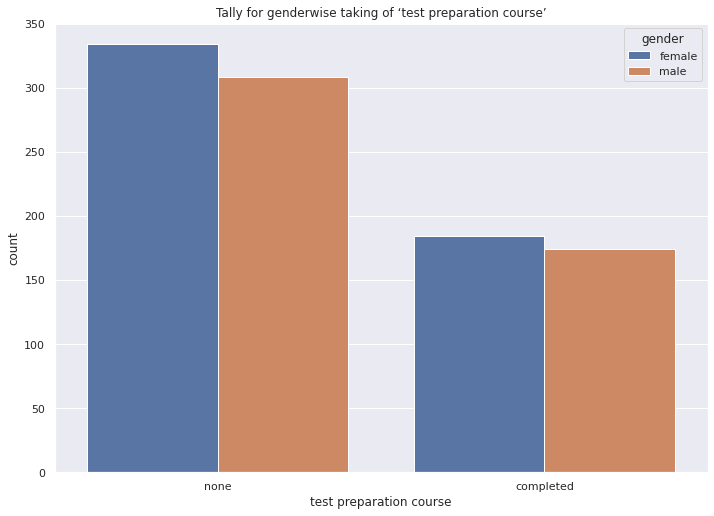

In [105]:
ax = sns.countplot(data= df, x = 'test preparation course', hue = 'gender')
ax.set(title = 'Tally for genderwise taking of ‘test preparation course’')

 Total Number of Male & Female Students belonging to each student group

[Text(0.5, 1.0, 'Total Number of Male & Female Students belonging to each student group')]

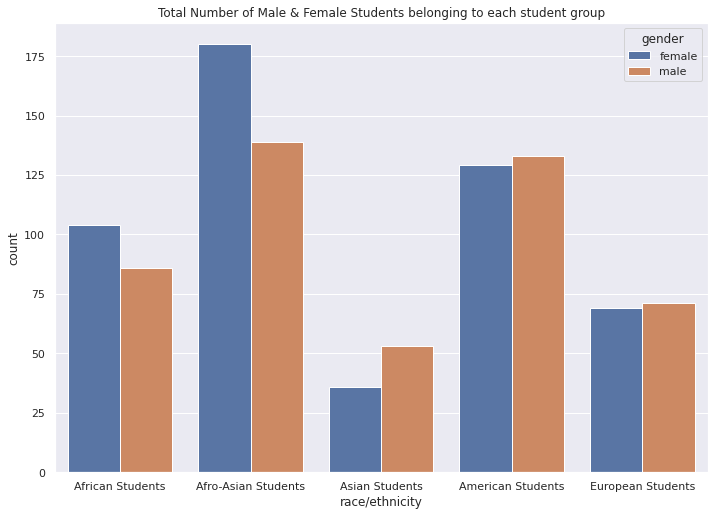

In [106]:
ax1 = sns.countplot(data= df, x = 'race/ethnicity', hue = 'gender')
ax1.set(title = 'Total Number of Male & Female Students belonging to each student group')

No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50), ‘first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’, ‘Reading’ and ‘Writing’

In [107]:
# np.where() is used to create new columns based on conditions
# np.bitwise_and is used within np functions instead of '&'
def category(stri):
  df[stri+'_category'] = np.where(df[stri+' score']<40,'failed',
                          np.where(np.bitwise_and(df[stri+' score']>=40 ,df[stri+' score'] <= 50),'second class',
                                   np.where(np.bitwise_and(df[stri+' score']>=60,df[stri+' score'] <= 75),'first class','distinction')))

In [108]:
# We are creating three columns here by calling the function thrice
category('math')
category('reading')
category('writing')
df.head(2)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,math_category,reading_category,writing_category
0,female,African Students,bachelor's degree,none,72,72,74,first class,first class,first class
1,female,Afro-Asian Students,NaN,completed,69,90,88,first class,distinction,distinction


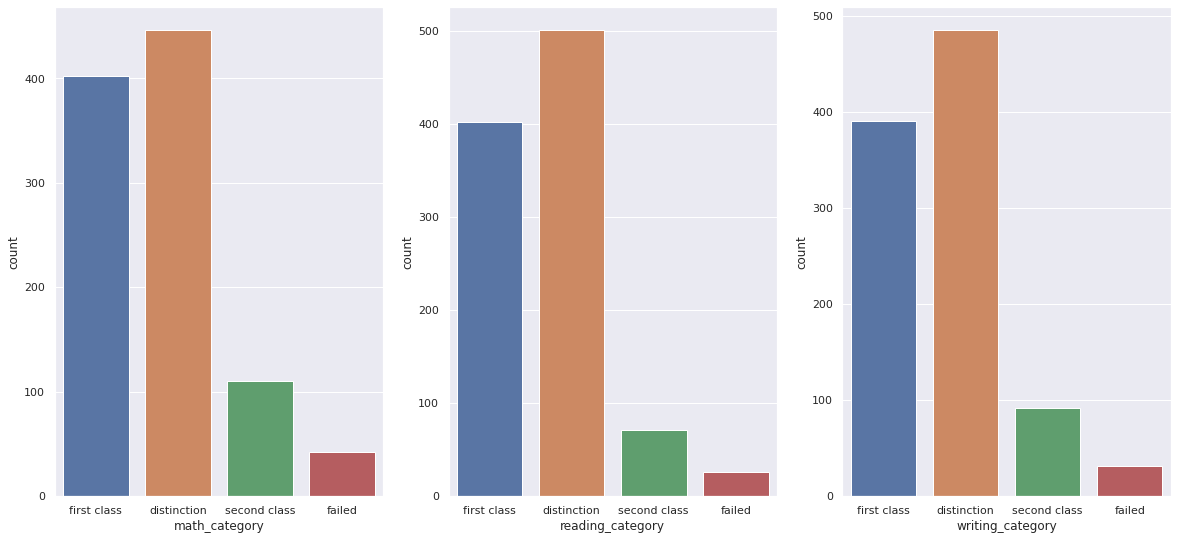

In [109]:
# To plot multiple graphs we use subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,9))

def plotting(stri, i):
  sns.countplot(data=df, x=stri+'_category', ax=ax[i])

plotting('math',0)
plotting('reading',1)
plotting('writing',2)
